# Decision trees

Decision trees are a non-parametric learning method used for classification and regression. Trees are often represented with a graph like model where each note is a test and each branch represents the outcome of the test.

Examples taken from

1. Scikit-Learn [web site](http://scikit-learn.org/stable/modules/tree.html)
2. [Jake Vanderplas'](https://github.com/jakevdp/sklearn_pycon2015/blob/master/notebooks/03.2-Regression-Forests.ipynb) Jupyter notebook examples

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from matplotlib.colors import ListedColormap

from IPython.core.display import HTML
#HTML("<style>.container { width:100% !important; }</style>")

To demonstrate the use of a decision tree classifier we use the Iris data set.

Load the Iris data set

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

The Iris data set has four features (sepal length, sepal width, petal length, petal width) which can be used to classify Iris flowers into three species denoted as "0", "1", "2" (setosa, versicolor, virginica)

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species_names'] = df.species
df.replace({'species_names':{
            0:iris['target_names'][0],
            1:iris['target_names'][1],
            2:iris['target_names'][2]            
        }}, inplace=True)
df.columns = [item.replace(' (cm)', '') for item in df.columns]
df.head()

,sepal length,sepal width,petal length,petal width,species,species_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


The scatter plot shows the three species of Iris in different colors plotted with the petal length and petal width on the y axis

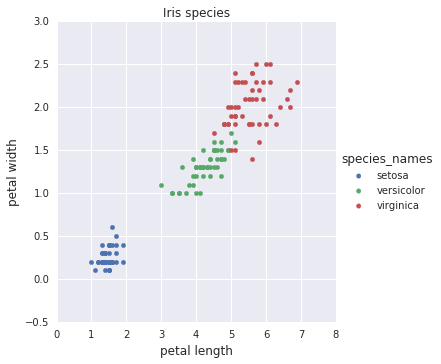

In [4]:
plt.rcParams.update({'axes.labelsize': 'large'})
plt.rcParams.update({'axes.titlesize': 'large'})
g = sns.FacetGrid(df, hue='species_names', size=5)
g.map(plt.scatter, 'petal length', 'petal width', s=20)
g.add_legend()
g.fig.gca().set_title('Iris species')

The output of the decision tree is shown using shaded regions that match the colors used to identify the flower. Using a decision tree with various depths the three species of Iris are classified, ineffectively at first with a tree of only one layer. As the number of layers increase the decision tree does a better job identifying the Iris species.

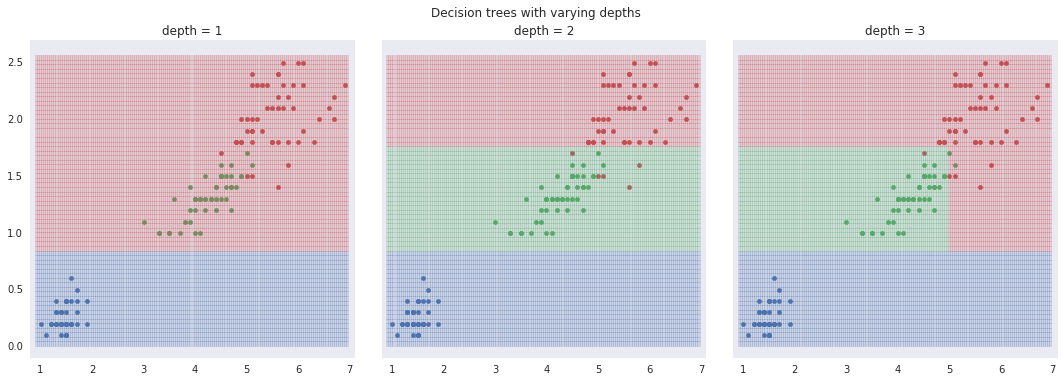

In [5]:
plt.rcParams.update({'figure.titlesize': 'large'})
step = 0.04
from sklearn import tree
X = df[['petal length', 'petal width']]
y = df.species
    
def mesh_plot(x, y, species, ax, clf):
    values = species.unique()
    colors = sns.color_palette()[:len(values)]
    xx, yy = np.meshgrid(
        np.arange(x.min() - 0.1, x.max() + 0.1, step),
        np.arange(y.min() - 0.1, y.max() + 0.1, step))
    mesh_predict = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    mesh_predict = mesh_predict.reshape(xx.shape)
    for i in range(len(colors)):
        ax.scatter(x[df.species == values[i]], y[df.species == values[i]], color=colors[i])
        ax.set_xlim(x.min() - 0.2, x.max() + 0.2)
        ax.set_ylim(y.min() - 0.2, y.max() + 0.2)
    ax.pcolormesh(xx, yy, mesh_predict,
        cmap=ListedColormap(sns.color_palette()[:3]), alpha=0.2)
    ax.set_title('depth = {}'.format(clf.max_depth))

fig, ax = plt.subplots(1, 3, sharey=True, figsize=(15, 5), squeeze=True)
fig.tight_layout()
fig.suptitle('Decision trees with varying depths', y=1.05)

for idx in range(0, 3):
    clf = tree.DecisionTreeClassifier(max_depth=idx + 1, random_state=0).fit(X, df.species)
    mesh_plot(df['petal length'], df['petal width'], df.species, ax[idx], clf)

The decision tree rules can also be represented using a graph like drawing with the root node on the left and the leaf nodes on the right

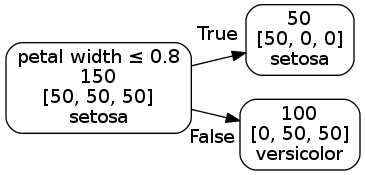

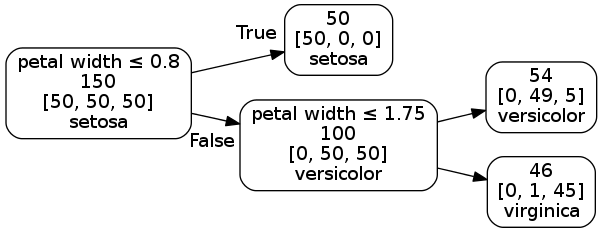

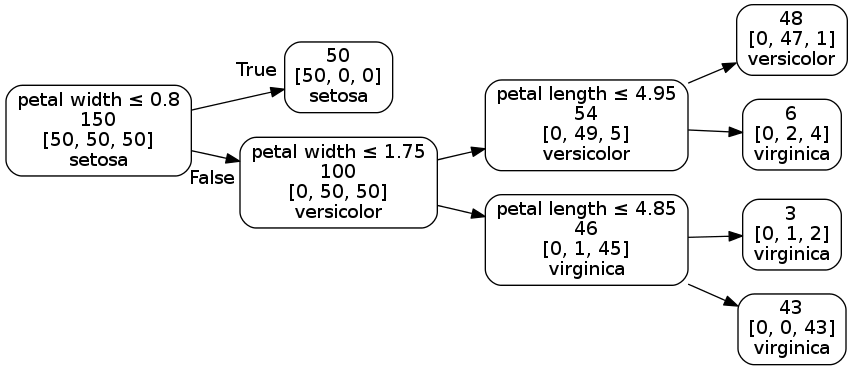

In [7]:
import pydot_ng
from sklearn.externals.six import StringIO
from IPython.display import Image, display

def plot_tree(clf):
    dot_data = StringIO()
    tree.export_graphviz(
        clf, out_file=dot_data, 
        feature_names=['petal length', 'petal width'],
        label=None, class_names=iris.target_names,
        filled=False, rounded=True, special_characters=True,
        impurity=False, rotate=True)
    graph = pydot_ng.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()

for idx in range(0, 3):
    clf = tree.DecisionTreeClassifier(max_depth=idx + 1, random_state=0).fit(X, df.species)
    png = plot_tree(clf)
    display(Image(png))

Finally we use a decision tree without limiting the depth. It is able to classify all the flowers correctly.

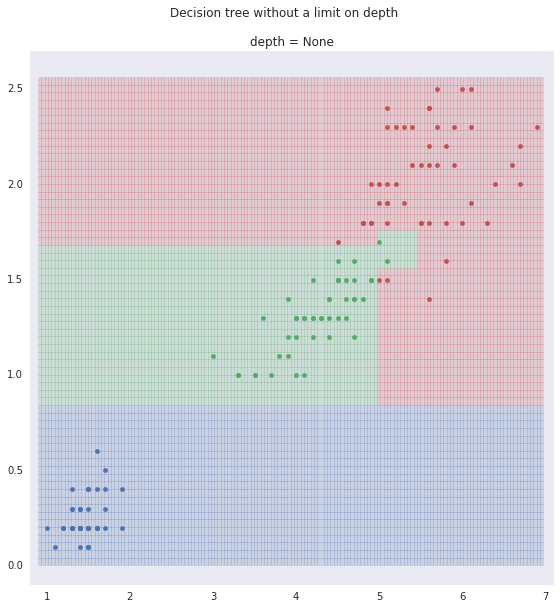

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
fig.tight_layout()
fig.suptitle('Decision tree without a limit on depth', y=1.05)
clf = tree.DecisionTreeClassifier(random_state=0).fit(X, df.species)
mesh_plot(df['petal length'], df['petal width'], df.species, ax, clf)